# APSC-5984 Lab 5: Dataframe

Due: 2023-02-20 (Monday) 23:59:59

## 0. Overview

We will introduce the concept of `DataFrame` in this lab. You will be intstructed to use the Python library `pandas` to manipulate dataframes. First, let's import the library. Conventionally, we import it as `pd`.

In [1]:
import pandas as pd
import os
os.chdir("data")
pd.set_option("display.notebook_repr_html", False)

## 1. Data Loading and Saving

We will work on the several files in the `lab_05` folder to practice how to load and save files

### 1.1 CSV and tab-delimited files

#### 1.1.1 Separators

The basic function to load data in `pandas` is `pd.read_csv()`. It can read data from a CSV file or a tab-delimited file. The default delimiter is comma "`,`", but it also allows you to specify other delimiters, such as tab "`\t`".

The file `file_A.csv` is a CSV file with comma as the delimiter:

In [2]:
!cat file_A.csv

id,A,B,C
a1,1,1,1
a2,0,1,0
a3,1,0,1

In [3]:
pd.read_csv('file_A.csv')

   id  A  B  C
0  a1  1  1  1
1  a2  0  1  0
2  a3  1  0  1

The file `file_A.csv` was correctly loaded into Python. The dataframe has 3 rows and 4 columns. What if we use the same way to load the file `file_B.txt` that is tab-delimited?

In [4]:
!cat file_B.txt

id	A	B	C
a1	1	1	1
a2	0	1	0
a3	1	0	1

In [5]:
pd.read_csv('file_B.txt')

   id\tA\tB\tC
0  a1\t1\t1\t1
1  a2\t0\t1\t0
2  a3\t1\t0\t1

The result was not what we expected. The reason is that the default delimiter is comma, but the file is tab-delimited. We can specify the delimiter as tab "`\t`" to fix the problem.

In [6]:
pd.read_csv('file_B.txt', sep='\t')

   id  A  B  C
0  a1  1  1  1
1  a2  0  1  0
2  a3  1  0  1

Great! Noted that `sep` can be any character, such as "`|`", "`;`", "`:`", etc. So, always check the delimiter before loading the file.

#### 1.1.2 Header

In some cases, the first row of the file is not the header. We can use the argument `header` to specify the row number of the header.

This example shows what would happen if we do not specify the header wiht a non-header file `file_A_nh.csv`.

In [7]:
!cat file_A_nh.csv

a1,1,1,1
a2,0,1,0
a3,1,0,1

In [8]:
pd.read_csv('file_A_nh.csv')

   a1  1  1.1  1.2
0  a2  0    1    0
1  a3  1    0    1

The first row was loaded as the header. Here is the fix.

In [9]:
pd.read_csv('file_A_nh.csv', header=None)

    0  1  2  3
0  a1  1  1  1
1  a2  0  1  0
2  a3  1  0  1

Some files may be coded with two headers:

In [10]:
!cat file_A_2h.csv

id,A,B,C
a1,1,1,1
a2,0,1,0
a3,1,0,1
id,D,E,F
a4,1,1,1
a5,0,1,0
a6,1,0,1

If we want the 5th row to be the header, we can use `header=4` (again, it is 0-based).

In [11]:
pd.read_csv('file_A_2h.csv', header=4)

   id  D  E  F
0  a4  1  1  1
1  a5  0  1  0
2  a6  1  0  1

### 1.2 Excel spreadsheet (.xlsx)

Excel spreadsheet is a common format for data storage. However, given it is a format that contains multiple sheets, it is not straightforward to load it into a tabular format.

#### 1.2.1 Load a single sheet

Here is an example of using `pd.read_excel()` to load the spreadsheet `file_C.xlsx`:

In [12]:
pd.read_excel('file_C.xlsx')

   id  A  B  C
0  a1  1  1  1
1  a2  0  1  0
2  a3  1  0  1

By default, it only loads the first sheet. We can specify the sheet name or the sheet number to load other sheets.

In [13]:
pd.read_excel('file_C.xlsx', sheet_name='Sheet2')

   id  D  E  F
0  a4  0  1  0
1  a5  0  0  0
2  a6  1  1  0
3  a7  2  2  0
4  a8  3  3  0
5  a9  4  4  0

In [14]:
pd.read_excel('file_C.xlsx', sheet_name='Sheet3')

          A         B
0  0.631007  0.034287
1  0.114071  0.370723
2  0.156949  0.851093
3  0.051913  0.089328
4  0.089216  0.861941
5  0.572473  0.364972
6  0.452546  0.152391
7  0.052752  0.024641

### 1.2.2 Dictionary of dataframes

In `pandas`, Excel spreadsheet is loaded as a dictionary of dataframes. The keys are the sheet names, and the values are the dataframes.

To load the entire spreadsheet taht contains all sheets, we can use `pd.read_excel()` with `sheet_name=None`:


In [15]:
data = pd.read_excel('file_C.xlsx', sheet_name=None)
print(data)

{'Sheet1':    id  A  B  C
0  a1  1  1  1
1  a2  0  1  0
2  a3  1  0  1, 'Sheet2':    id  D  E  F
0  a4  0  1  0
1  a5  0  0  0
2  a6  1  1  0
3  a7  2  2  0
4  a8  3  3  0
5  a9  4  4  0, 'Sheet3':           A         B
0  0.631007  0.034287
1  0.114071  0.370723
2  0.156949  0.851093
3  0.051913  0.089328
4  0.089216  0.861941
5  0.572473  0.364972
6  0.452546  0.152391
7  0.052752  0.024641}


The sheets might not be displayed well aligned, but you can still see the keys as each sheet name and its corresponding dataframe. You can use the 'lookup' function we learned in the previous lecture to find the dataframe of a specific sheet:

In [16]:
data["Sheet3"]

          A         B
0  0.631007  0.034287
1  0.114071  0.370723
2  0.156949  0.851093
3  0.051913  0.089328
4  0.089216  0.861941
5  0.572473  0.364972
6  0.452546  0.152391
7  0.052752  0.024641

### 1.3 Save data

#### 1.3.1 Save as CSV

We can use `df.to_csv()` to save a dataframe as a CSV file. Here are parameters that we can use:

- `sep`: the delimiter. Default is comma "`,`".
- `index`: whether to save the index column. Default is `True`.
- `header`: whether to save the header. Default is `True`.
- `columns`: the columns to save. Default is `None` (all columns).
- `mode`: the mode to open the file. Default is `"w"` (write). Other options are `"a"` (append) and `"r"` (read).

In [17]:
data["Sheet1"].to_csv('out_A.csv')
!cat out_A.csv

,id,A,B,C
0,a1,1,1,1
1,a2,0,1,0
2,a3,1,0,1


In [18]:
data["Sheet1"].to_csv('out_A.csv', index=False)
!cat out_A.csv

id,A,B,C
a1,1,1,1
a2,0,1,0
a3,1,0,1


In [19]:
data["Sheet1"].to_csv('out_A.csv', index=False, header=None)
!cat out_A.csv

a1,1,1,1
a2,0,1,0
a3,1,0,1


In [20]:
data["Sheet1"].to_csv('out_A.csv', index=False, header=None, sep='\t')
!cat out_A.csv

a1	1	1	1
a2	0	1	0
a3	1	0	1


In [21]:
data["Sheet1"].to_csv('out_A.csv', index=False, columns=['A', 'B'])
!cat out_A.csv

A,B
1,1
0,1
1,0


### 1.3.2 Save as Excel spreadsheet

Pandas also allows us to save a dataframe as an Excel spreadsheet. It is highly recommended to interact with Excel spreadsheet using `with` statement when you want to work with multiple sheets. Here is an example:

In [22]:
with pd.ExcelWriter('out_C2.xlsx') as writer:
    data["Sheet1"].to_excel(writer, sheet_name='Sheet1')
    data["Sheet2"].to_excel(writer, sheet_name='Sheet2')
    data["Sheet3"].to_excel(writer, sheet_name='Sheet3')

An example to append a new sheet to an existing spreadsheet:

In [23]:
with pd.ExcelWriter('out_C2.xlsx', mode="a") as writer:
    data["Sheet1"].to_excel(writer, sheet_name='Sheet4', index=False)
    data["Sheet2"].to_excel(writer, sheet_name='Sheet5', index=False)
    data["Sheet3"].to_excel(writer, sheet_name='Sheet6', index=False)

## 2. Construct a dataframe

We can also construct a dataframe from scratch. We can start with a dictionary of lists to define our dataframe:

In [24]:
data = dict()
data["id"] = ["id1", "id2", "id3", "id4"]
data["factor"] = ["A", "B", "A", "B"]
data["value"] = [1, 2, 3, 4]
print(data)

{'id': ['id1', 'id2', 'id3', 'id4'], 'factor': ['A', 'B', 'A', 'B'], 'value': [1, 2, 3, 4]}


And we can put the dictionary into a dataframe using `pd.DataFrame()`:

In [25]:
df = pd.DataFrame(data)
df

    id factor  value
0  id1      A      1
1  id2      B      2
2  id3      A      3
3  id4      B      4

## 3. Dataframe manipulation

### 3.1 Index location (.iloc)

We can use `.iloc()` method to access the data by numeric index location. The indexing rule is the same as what we have learned in the sections of `list` and `numpy`. In `.iloc()`, the first argument is the row index, and the second argument is the column index.

Here is an example dataframe:

In [26]:
data = pd.read_excel('file_C.xlsx', sheet_name="Sheet1")
data

   id  A  B  C
0  a1  1  1  1
1  a2  0  1  0
2  a3  1  0  1

Get the second and third row:

In [27]:
data.iloc[[1, 2], :]

   id  A  B  C
1  a2  0  1  0
2  a3  1  0  1

Get multiple (first and second) columns. (Note we use `:` to specify all rows.)

In [28]:
data.iloc[:, [0, 1]]

   id  A
0  a1  1
1  a2  0
2  a3  1

It is equivalent to using slicing:

In [29]:
data.iloc[:, :2]

   id  A
0  a1  1
1  a2  0
2  a3  1

### 3.2 Label-based indexing (.loc)

The `.loc()` method is another way to access the data. It works with either column/index names or boolean arrays.

In [30]:
data.loc[[0, 1], :]

   id  A  B  C
0  a1  1  1  1
1  a2  0  1  0

In [31]:
data.loc[:, ['id', 'B']]

   id  B
0  a1  1
1  a2  1
2  a3  0

Use boolean to select column containing a letter "B". (We can use `df.columns` to list all column names)

In [32]:
colnames = data.columns
bol_B = ["B" in col for col in colnames]
print(bol_B)

[False, False, True, False]


In [33]:
data.loc[:, bol_B]

   B
0  1
1  1
2  0

In [34]:
data

   id  A  B  C
0  a1  1  1  1
1  a2  0  1  0
2  a3  1  0  1

### 3.3 Create a new column
The `.loc()` method is also a recommended way (compared to `df["new_column"]`) to create a new column. Simply put a desired column name in the second argument, and assign a value to it.

In [35]:
data.loc[:, "new_col"] = ["new"] * 3
# or
data.loc[:, "new_col"] = "new"
data

   id  A  B  C new_col
0  a1  1  1  1     new
1  a2  0  1  0     new
2  a3  1  0  1     new

### 3.4 Miscellaneous

#### 3.4.1 Drop a column

In [36]:
data.drop(columns=["B"])

   id  A  C new_col
0  a1  1  1     new
1  a2  0  0     new
2  a3  1  1     new

### 3.4.2 Drop a row

In [37]:
data.drop(index=[0, 1])

   id  A  B  C new_col
2  a3  1  0  1     new

### 3.4.3 inspect the dimension and summary

`df.shape` returns the dimension of the dataframe. This tells us that the dataframe has 3 rows and 5 columns.

In [38]:
data.shape

(3, 5)

df.info() is another way to inspect the dataframe of its dimension and data types of each column.

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       3 non-null      object
 1   A        3 non-null      int64 
 2   B        3 non-null      int64 
 3   C        3 non-null      int64 
 4   new_col  3 non-null      object
dtypes: int64(3), object(2)
memory usage: 248.0+ bytes


`df.describe()` returns the summary statistics of the dataframe. Only numeric columns are included in the summary statistics.

In [40]:
data.describe()

              A         B         C
count  3.000000  3.000000  3.000000
mean   0.666667  0.666667  0.666667
std    0.577350  0.577350  0.577350
min    0.000000  0.000000  0.000000
25%    0.500000  0.500000  0.500000
50%    1.000000  1.000000  1.000000
75%    1.000000  1.000000  1.000000
max    1.000000  1.000000  1.000000

`df["column"].value_counts()` returns the counts of unique values in that specified column. Below the example tells us that there are two rows with value 1 and one row with value 0.

In [41]:
data["B"].value_counts()

1    2
0    1
Name: B, dtype: int64

## 4.Querying with an example dataframe

Let's create a mock dataframe for this section:

In [42]:
import numpy as np
import pandas as pd

factors = [i for _ in range(30) for i in ["A", "B", "C", "D"]]
# random sample from id {1, 2, 3, 4, 5, 6}
ids = np.random.choice(["id_%d" % (i + 1) for i in range(6)], 120)
envs = [i for _ in range(60) for i in ["env_1", "env_2"]]
obs = np.random.normal(0, 1, 120)
data = pd.DataFrame({"factor": factors, "id": ids, "env": envs, "obs": obs})
data.to_csv("file_D.csv", index=False)

In [43]:
data = pd.read_csv("file_D.csv")
data.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   factor  120 non-null    object 
 1   id      120 non-null    object 
 2   env     120 non-null    object 
 3   obs     120 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.9+ KB


    factor    id    env       obs
0        A  id_5  env_1  1.398247
1        B  id_2  env_2  0.118081
2        C  id_1  env_1 -1.352220
3        D  id_2  env_2  3.028106
4        A  id_2  env_1  0.885938
..     ...   ...    ...       ...
115      D  id_3  env_2  0.352519
116      A  id_5  env_1 -1.363961
117      B  id_4  env_2 -1.148599
118      C  id_5  env_1 -0.769891
119      D  id_5  env_2  1.626178

[120 rows x 4 columns]

### 4.1 Check the distribution of each column

In [44]:
data["factor"].value_counts()

A    30
B    30
C    30
D    30
Name: factor, dtype: int64

In [45]:
data["id"].value_counts()

id_5    32
id_6    24
id_3    20
id_2    19
id_1    15
id_4    10
Name: id, dtype: int64

In [46]:
data["env"].value_counts()

env_1    60
env_2    60
Name: env, dtype: int64

In [47]:
data["obs"].value_counts()

 1.398247    1
 0.118081    1
-0.250095    1
 1.214479    1
 1.006255    1
            ..
 0.645562    1
 0.397835    1
-0.784988    1
 0.732589    1
 1.626178    1
Name: obs, Length: 120, dtype: int64

In [48]:
data["obs"].describe()

count    120.000000
mean      -0.083406
std        1.053231
min       -2.408920
25%       -0.850797
50%       -0.147953
75%        0.602563
max        3.028106
Name: obs, dtype: float64

For better visualization, we can use `df.hist()` to plot the histogram of each column.

<AxesSubplot: >

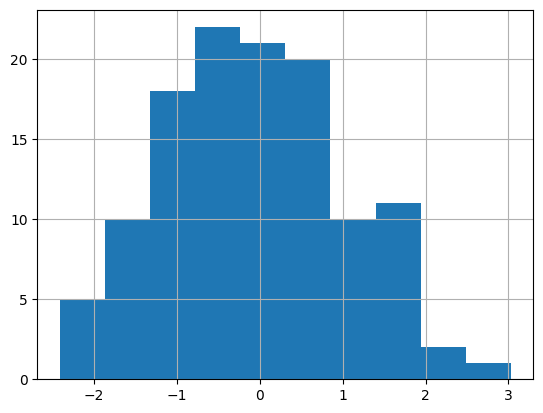

In [49]:
data["obs"].hist()

### 4.2 Subset the dataframe (query)

In [50]:
data_sub = data.query("obs > 0")
data_sub[:5]

  factor    id    env       obs
0      A  id_5  env_1  1.398247
1      B  id_2  env_2  0.118081
3      D  id_2  env_2  3.028106
4      A  id_2  env_1  0.885938
5      B  id_6  env_2  0.061932

<AxesSubplot: >

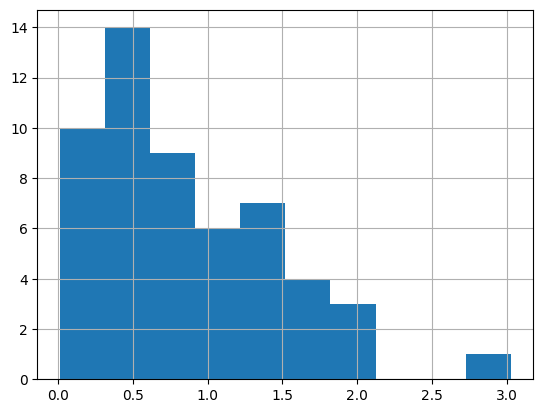

In [51]:
data_sub["obs"].hist()

In [52]:
data_id1 = data.query("id == 'id_1'")
data_id1[:5]

   factor    id    env       obs
2       C  id_1  env_1 -1.352220
14      C  id_1  env_1 -1.087348
25      B  id_1  env_2  1.015025
35      D  id_1  env_2  0.645562
37      B  id_1  env_2 -0.216822

array([[<AxesSubplot: title={'center': 'obs'}>]], dtype=object)

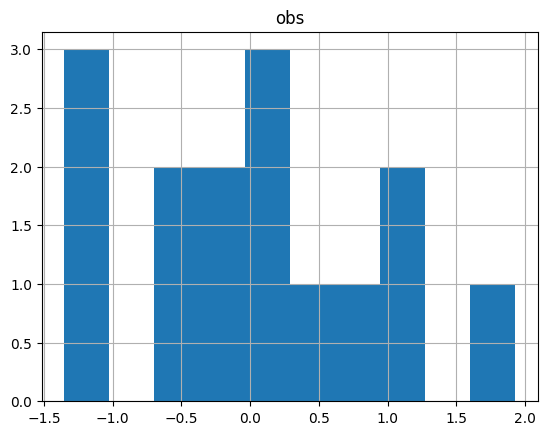

In [53]:
data_id1.hist()

Multiple conditions can be combined using `&` (and) and `|` (or).

In [54]:
data.query("id == 'id_1' and (obs > 1 or obs < -1)")

   factor    id    env       obs
2       C  id_1  env_1 -1.352220
14      C  id_1  env_1 -1.087348
25      B  id_1  env_2  1.015025
77      B  id_1  env_2  1.927947
79      D  id_1  env_2 -1.319636
97      B  id_1  env_2  1.051139

### 4.3 Grouping

In [55]:
data.groupby("id")["obs"].mean()

id
id_1    0.011577
id_2    0.072730
id_3   -0.409600
id_4   -0.231937
id_5   -0.036769
id_6    0.005157
Name: obs, dtype: float64

In [56]:
data.groupby(["id", "factor"])["obs"].mean()

id    factor
id_1  A        -0.435927
      B         0.835641
      C        -0.620353
      D        -0.116713
id_2  A         0.457923
      B         0.196333
      C        -0.981377
      D        -0.064095
id_3  A        -0.979025
      B        -0.527586
      C         0.002107
      D        -0.170709
id_4  A        -1.287146
      B        -1.274956
      C         0.183495
      D         1.237600
id_5  A         0.021462
      B        -0.337031
      C        -0.018164
      D         0.073601
id_6  A        -0.132296
      B         0.030516
      C         0.297709
      D        -0.326848
Name: obs, dtype: float64

In [57]:
# multiple calculation
cus_fun = lambda x: x.max() - x.min()
pivot = data.groupby(["id", "factor"])["obs"].agg(["mean", "std", "count", cus_fun])
pivot

                 mean       std  count  <lambda_0>
id   factor                                       
id_1 A      -0.435927       NaN      1    0.000000
     B       0.835641  0.801314      5    2.144769
     C      -0.620353  0.578104      5    1.369322
     D      -0.116713  0.847288      4    1.965199
id_2 A       0.457923  0.490873      6    1.238011
     B       0.196333  1.385810      5    3.800971
     C      -0.981377  0.786843      2    1.112764
     D      -0.064095  1.672929      6    4.749550
id_3 A      -0.979025  0.958212      5    2.420366
     B      -0.527586  1.745133      4    3.964272
     C       0.002107  1.062830      4    2.192775
     D      -0.170709  0.616826      7    1.659665
id_4 A      -1.287146  0.622728      2    0.880671
     B      -1.274956  0.826101      3    1.637642
     C       0.183495  0.207320      2    0.293195
     D       1.237600  0.902724      3    1.747751
id_5 A       0.021462  0.901412      9    2.762209
     B      -0.337031  1.111385

In [58]:
pivot.loc["id_5"]

            mean       std  count  <lambda_0>
factor                                       
A       0.021462  0.901412      9    2.762209
B      -0.337031  1.111385      5    2.792467
C      -0.018164  0.955649     11    2.789181
D       0.073601  1.016560      7    2.758430

In [59]:
pivot.loc["id_3"].loc["A"]

mean         -0.979025
std           0.958212
count         5.000000
<lambda_0>    2.420366
Name: A, dtype: float64

In [60]:
data_pivot = pivot.reset_index()
data_pivot

      id factor      mean       std  count  <lambda_0>
0   id_1      A -0.435927       NaN      1    0.000000
1   id_1      B  0.835641  0.801314      5    2.144769
2   id_1      C -0.620353  0.578104      5    1.369322
3   id_1      D -0.116713  0.847288      4    1.965199
4   id_2      A  0.457923  0.490873      6    1.238011
5   id_2      B  0.196333  1.385810      5    3.800971
6   id_2      C -0.981377  0.786843      2    1.112764
7   id_2      D -0.064095  1.672929      6    4.749550
8   id_3      A -0.979025  0.958212      5    2.420366
9   id_3      B -0.527586  1.745133      4    3.964272
10  id_3      C  0.002107  1.062830      4    2.192775
11  id_3      D -0.170709  0.616826      7    1.659665
12  id_4      A -1.287146  0.622728      2    0.880671
13  id_4      B -1.274956  0.826101      3    1.637642
14  id_4      C  0.183495  0.207320      2    0.293195
15  id_4      D  1.237600  0.902724      3    1.747751
16  id_5      A  0.021462  0.901412      9    2.762209
17  id_5  

In [61]:
data_pivot.to_csv("out_pivot.csv", index=False)

In [62]:
!cat out_pivot.csv

id,factor,mean,std,count,<lambda_0>
id_1,A,-0.435927455896309,,1,0.0
id_1,B,0.835640850987664,0.8013137193298202,5,2.1447687175404817
id_1,C,-0.6203527650930685,0.5781035975376023,5,1.3693220909788446
id_1,D,-0.11671325771509983,0.8472881684807839,4,1.9651986173824076
id_2,A,0.45792275193638793,0.4908730741241819,6,1.238010871518537
id_2,B,0.1963334406134314,1.3858095866169606,5,3.8009711847635033
id_2,C,-0.9813772794313279,0.7868431700170971,2,1.1127642824988178
id_2,D,-0.06409496686499205,1.6729292446748563,6,4.749550429119074
id_3,A,-0.9790254742953574,0.9582120751767326,5,2.4203661210536795
id_3,B,-0.527585753523783,1.745132821938664,4,3.9642721480327245
id_3,C,0.0021068933453006755,1.0628298945134238,4,2.192775396044442
id_3,D,-0.1707089820182411,0.6168262906194072,7,1.6596652295952645
id_4,A,-1.287145637008567,0.6227280920165232,2,0.8806705134004879
id_4,B,-1.2749564562223732,0.8261006264531076,3,1.6376416458092908
id_4,C,0.18349548842433044,0.20732026425577918,2,0.29319512946529